In [1]:
import csv #used for reading and parsing data from a text file
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#get the empty rows
filename='clean_cmj.txt'
datafile = csv.reader(open(filename, 'r'), delimiter='\t')

counter = 0 #counter for number of rows
empty_rows = []
for row in datafile:
    if len(row)==0: #test for an empty row
        empty_rows.append(counter)    
    counter += 1
print(empty_rows)

[4, 272, 540, 2127]


In [3]:
datafile = csv.reader(open(filename, 'r'), delimiter='\t')

# get position data
counter = 0 #counter for number of rows
pos_header = []
pos_units = []
pos_direction = []
pos_data = []
for row in datafile:
    if counter==empty_rows[0]+1:
        pos_header.append(row)
    elif counter==empty_rows[0]+2:
        pos_units.append(row)
    elif counter==empty_rows[0]+3:
        pos_direction.append(row)
    elif counter>empty_rows[0]+3 and counter<empty_rows[1] :
        pos_data.append(row)
    elif counter>=empty_rows[1]:
        break
    counter = counter + 1
    
datafile = csv.reader(open(filename, 'r'), delimiter='\t')
# get force data
counter1 = 0 #counter for number of rows
force_header = []
force_units = []
force_direction = []
force_data = []
for row in datafile:
    if counter1==empty_rows[1]+1:
        force_header.append(row)
    elif counter1==empty_rows[1]+2:
        force_units.append(row)
    elif counter1==empty_rows[1]+3:
        force_direction.append(row)
    elif counter1>empty_rows[1]+3 and counter1<empty_rows[2] :
        force_data.append(row)
    elif counter1>=empty_rows[2]:
        break
    counter1 = counter1 + 1
    
force_units[0][0]

's'

In [4]:
#make headers
pos_head_unit = []
counter = 0
i = 0
for i in range(len(pos_header[0])):
    if i == 0:
        head_plus_unit = pos_header[0][i]
        pos_head_unit.append(head_plus_unit)
    else:
        if counter == 0:
            head_plus_unit = pos_header[0][i] +  '_'  +   pos_direction[0][i]
            pos_head_unit.append(head_plus_unit) 
        else:
            head_plus_unit = pos_header[0][i-counter] +  '_'  + pos_direction[0][i] 
            pos_head_unit.append(head_plus_unit)    
            
        counter += 1
        if counter == 3:
            counter = 0
            
force_head_unit = []
counter1 = 0

for j in range(len(force_header[0])):
    if j == 0:
        fhead_plus_unit = force_header[0][j]
        force_head_unit.append(fhead_plus_unit)
    else:
        if counter1 == 0:
            fhead_plus_unit = force_header[0][j] +  '_'  +   force_direction[0][j]
            force_head_unit.append(fhead_plus_unit) 
        else:
            fhead_plus_unit = force_header[0][j-counter1] +  '_'  + force_direction[0][j] 
            force_head_unit.append(fhead_plus_unit)    
            
        counter1 += 1
        if counter1 == 3:
            counter1 = 0

In [5]:
df = pd.DataFrame(pos_data, columns=pos_head_unit)
#df

In [6]:
df1 = pd.DataFrame(force_data, columns=force_head_unit)
#df1

In [7]:
#make all floats

df = df.astype(float)
df1 = df1.astype(float)

In [8]:
#make array

df.shape[1]
data = df.values
pos_data=data[:,1:-1]

df1.shape[1]
data1 = df1.values
force_data=data1[:,1:-1]
print(pos_data.shape, force_data.shape)

(264, 119) (264, 23)


<Figure size 432x288 with 0 Axes>

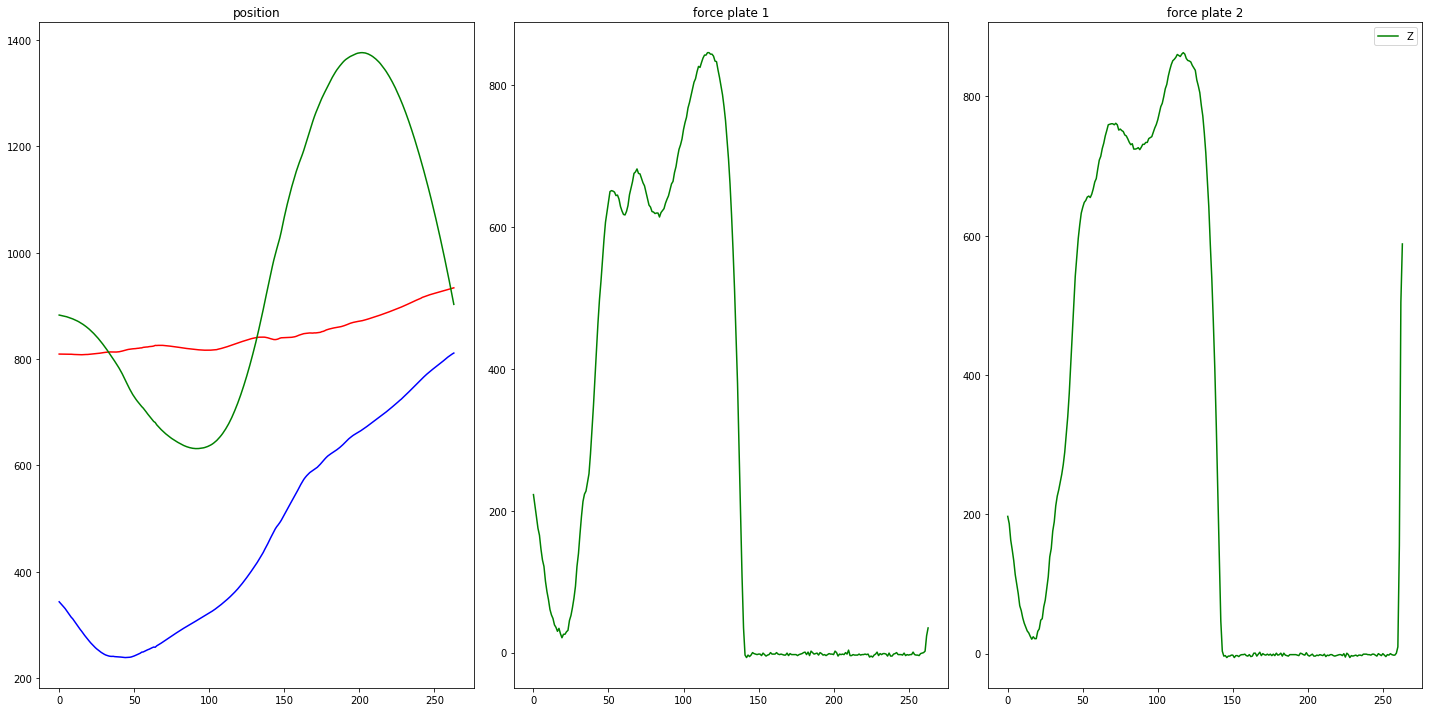

In [9]:
# plt.figure()
# plt.figure(figsize=(20, 10))

# plt.subplot(1,3,1)
# plt.plot(df['R.Hip_X'], 'r', label = 'X')
# plt.plot(df['R.Hip_Y'], 'b', label = 'Y')
# plt.plot(df['R.Hip_Z'], 'g', label = 'Z')
# plt.title('position')

# plt.subplot(1,3,2)
# #plt.plot(df1['GRW1.F_X'], 'r', label = 'X')
# #plt.plot(df1['GRW1.F_Y'], 'b', label = 'Y')
# plt.plot(df1['GRW1.F_Z'], 'g', label = 'Z')
# plt.title('force plate 1')


# plt.subplot(1,3,3)
# #plt.plot(df1['GRW2.F_X'], 'r', label = 'X')
# #plt.plot(df1['GRW2.F_Y'], 'b', label = 'Y')
# plt.plot(df1['GRW2.F_Z'], 'g', label = 'Z')
# plt.title('force plate 2')

# plt.tight_layout()
# plt.legend()
# plt.show()

In [10]:
from vpython import *

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [11]:
def animate(row0): #row0 is first row of animation
    global rowPaused
    for row in range(row0,pos_data.shape[0]):
        rate(40)
        j=0
        l = 0
        for k in range(pos_data.shape[1]-2):
            if k % 3==0:
                if pos_data[row,k] != 0:
                    balls[j].pos = vec(pos_data[row,k],pos_data[row,k+2], pos_data[row,k+1])
                    balls[j].visible = True
                    if k % 4==0 and l < 2:
                        forces[l].axis = 1.5*vector(force_data[row,k],force_data[row,k+2],force_data[row,k+1])
                        forces[l].visible = True
                        l = l+1

                else:
                    balls[j].visible = False

                j = j+1
        if running==False:
            rowPaused = row
            return row
    rowPaused = 0
    return row

In [ ]:
scene=canvas()
scene.width = 400
scene.height = 400
scene.background = color.white
scene.title = "Counter Movement Jump \n"
x = 500
y = 1000
z = 1000

scene.camera.pos = vector(x, y ,0)

running = True
def Run(b):
    global running
    running = not running 
    if running: 
        b.text = "Pause"
    else: 
        b.text = "Run"

def rotscene(s):
#    rotate(scene.up, angle=s, axis=vector(1,0,0) )
#    scene.up = vector(0,np.cos(s),np.cos(pi/2-s))
    stext.text = '{:1.2f}'.format(s.value)

#button(text="Pause", pos=scene.title_anchor, bind=Run)
button(text="Pause", bind=Run)
sl = slider(min=0, max=pi/2, value=0, length=200, bind=rotscene, right=15)
stext = wtext(text='{:1.2f}'.format(sl.value))


# draw axes
arrow(pos=vec(0,0,0), axis = vec(500,0,0), color=color.green)
arrow(pos=vec(0,0,0), axis = vec(0,500,0), color=color.red) ## Transformed z plane
arrow(pos=vec(0,0,0), axis = vec(0,0,500), color=color.blue) ## Transformed y plane

#initialize markers
balls = []

i = 0
for i in range(pos_data.shape[1]-2):
    
    if i % 3==0:
        ball = sphere(pos=vec(pos_data[0,i],pos_data[0,i+2],pos_data[0,i+1]), radius=20, color=(vec(1,1,1)+vec.random())/2 , make_trail = False, visible = True)
        balls.append(ball)

    i = i +1
    
    
#initialize forces
forces = []

force1 = arrow(pos=vector(500, 0,500), axis=5*vector(force_data[0,0],force_data[0,2],force_data[0,1]), shaftwidth=100, color=(vec(1,1,1)+vec.random())/2 ,  visible = True)
forces.append(force1)

force2 = arrow(pos=vector(1000, 0,500), axis=1.5*vector(force_data[12,0],force_data[12,2],force_data[12,1]), shaftwidth=100, color=(vec(1,1,1)+vec.random())/2 ,  visible = True)
forces.append(force2)

rowPaused = 0
while True:
    rate(10)
    if not running: continue
    animate(rowPaused)


<IPython.core.display.Javascript object>